<a href="https://colab.research.google.com/github/JoshuaBarsky/Projects/blob/main/Chessboard_puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Prisoner Chess Puzzle**
The objective of this game is to be able to flip just one coin in any arrangement of heads and tails on a chessboard, where your single flip would strategically point to one (and only one) specific square on the board.


A more detailed description can be found by watching the video below.
\
https://www.youtube.com/watch?v=wTJI_WuZSwE


*For setting colors*: Color palette website
\
https://coolors.co/0b3954-bfd7ea-ff6663-e0ff4f-fefffe

In [220]:
import numpy as np
from numpy import unravel_index
from PIL import Image, ImageDraw, ImageFont

#gets font from OS
import os
import cv2

In [221]:
positions = [[ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 1,  1,  1,  1,  1,  1,  1,  1,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0,],
            [ 0,  0,  0,  0,  0,  0,  0,  0]]

In [222]:
def boardImage():
  pixels = np.random.randint(0,256,(721,721,3), dtype = np.uint8)

  #color adjust
  backdrop_color = (191,215,234)
  squares_color = (11,57,84)
  border_color = (254,255,254)

  for i in range(len(pixels)):
    for k in range(len(pixels)):
      pixels[i][k] = backdrop_color
    for j in range(9):
      pixels[i][j*90] = border_color

  for i in range(4):  #makes dark squares
    for k in range(90):
      for j in range(89):
        pixels[i*180+k][j+1] = squares_color
        pixels[i*180+k][j+181] = squares_color
        pixels[i*180+k][j+361] = squares_color
        pixels[i*180+k][j+541] = squares_color

  for i in range(4):  #makes dark squares
    for k in range(90):
      for j in range(89):
        pixels[i*180+k+90][j+91] = squares_color
        pixels[i*180+k+90][j+271] = squares_color
        pixels[i*180+k+90][j+451] = squares_color
        pixels[i*180+k+90][j+631] = squares_color

  for i in range(9):
    for j in range(len(pixels)):
      pixels[i*90][j] = border_color

  return pixels


In [223]:
def drawTails(img, positions):
  for i in range(len(positions)):
    for j in range(len(positions)):
      if positions[i][j] == 0:
        T = ImageDraw.Draw(img)
        font_path = os.path.join(cv2.__path__[0],'qt','fonts','DejaVuSans.ttf')
        f = ImageFont.truetype(font_path, size=60)
        T.text((90*j+25, 90*i+15), "T", font=f, fill=(255,102,99))
  return img

def drawHeads(img, positions):
  for i in range(len(positions)):
    for j in range(len(positions)):
      if positions[i][j] == 1:
        T = ImageDraw.Draw(img)
        font_path = os.path.join(cv2.__path__[0],'qt','fonts','DejaVuSans.ttf')
        f = ImageFont.truetype(font_path, size=60)
        T.text((90*j+25, 90*i+15), "H", font=f, fill=(224,255,79))
  return img

In [224]:
def addPositionText(img):
  for i in range(8):
    for j in range(8):
      T = ImageDraw.Draw(img)
      T.text((90*j+75, 90*i+2), "{}{}".format(chr(65+i), j+1), fill=(0, 0, 0))

  return img

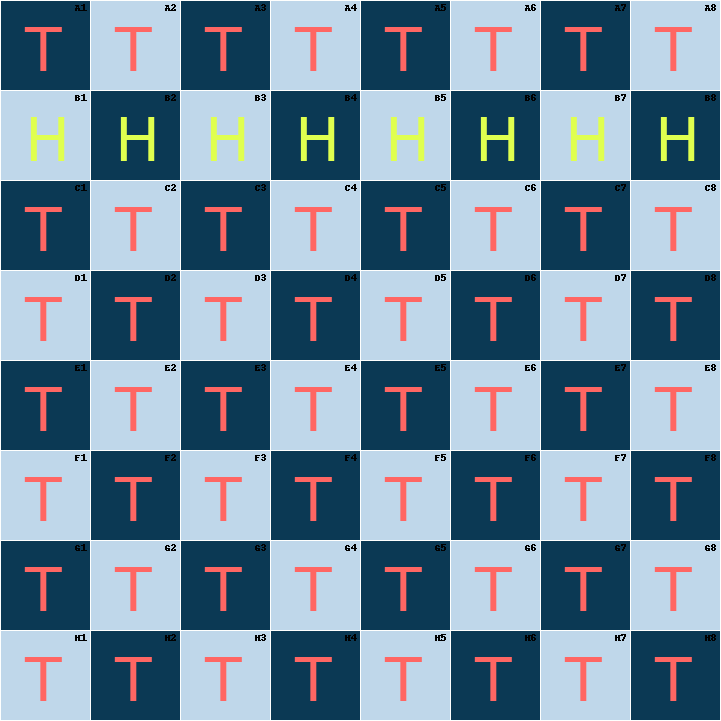

In [225]:
img = Image.fromarray(boardImage())
img = addPositionText(img)
img = drawHeads(img, positions)
img = drawTails(img, positions)
img.show()